# Retrain with same articles in each window

In [1]:
from NaiveBayes import NaiveBayes
import json
import numpy

def use_nb_indiv(datas_train, datas_valid, reTrain = 0):
    # reTrain = 0: no retrain
    #           1: use true to retrain
    #           2: use predict to retrain
    # The Naive Bayes Model
    nb = NaiveBayes()
    # Record all of the predictions
    predicts_all = []
    # Number of all of the correctly predicted articles
    correct_all = 0
    # Correctly predicted ratio in each part
    correct_ratios = []
    # First and only train if reTrain == 0
    if reTrain == 0:
        nb.train(datas_train)
    for cur_part in range(1,partition+1):
        # If no retrain
        if reTrain in [1, 2]:
            nb.train(datas_train)
        # All of the predictions in this part
        predicts = [nb.predict(data['content'])[0] for data in datas_valid]
        # Append to all of the predictions
        predicts_all += predicts
        # Number of correctly predicted articles in this part
        correct = 0
        for i in range(len(predicts)):
            if predicts[i] == datas_valid[i]['category']:
                correct += 1
        # Add to all of the correctly predicted articles
        correct_all += correct
        # Add to all of the ratios
        correct_ratios.append(correct/len(datas_valid))
        print("Correct: ", correct, "out of ", len(datas_valid))
        print(datas_valid[-1]['date'])
        # get next train, valid pair
        datas_train = datas[min(len(datas), plen*cur_part) : min(len(datas), plen*(cur_part+1))]
        datas_valid = datas[min(len(datas), plen*(cur_part+1)) : min(len(datas), plen*(cur_part+2))]
        # Update data_train only if use predict to retrain
        if reTrain == 2:
            for i in range(len(datas_train)):
                datas_train[i]['category'] = predicts[i]
    #
    res = "Correct: %d out of %d"%(correct_all, len(predicts_all))
    print(res)
    return correct_ratios
    #return res 

## retrain performance with random order

In [2]:
%%capture
with open('../datas/bbc_preprocessed.json') as f:
    datas = json.load(f)

import random
random.seed(5220)
random.shuffle(datas)

partition = 100
plen = len(datas)//partition
d1 = datas[:plen]
d2 = datas[plen:plen*2]

# no retrain
res1 = use_nb_indiv(d1, d2, reTrain = 0)
# use true to retrain
res2 = use_nb_indiv(d1, d2, reTrain = 1)
# use predict to retrain
res3 = use_nb_indiv(d1, d2, reTrain = 2)

In [3]:
import matplotlib.pyplot as plt

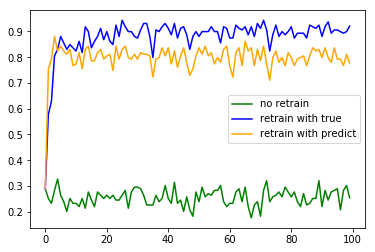

In [4]:
no_retrain_line,           = plt.plot(list(range(len(res1))), res1, label = 'no retrain', color = 'green')
retrain_with_true_line,    = plt.plot(list(range(len(res2))), res2, label = 'retrain with true', color = 'blue')
retrain_with_predict_line, = plt.plot(list(range(len(res2))), res3, label = 'retrain with predict', color = 'orange')
plt.legend(handles = [no_retrain_line, retrain_with_true_line, retrain_with_predict_line])
plt.show()

## retrain performance with timeseries order

In [5]:
%%capture
with open('../datas/bbc_preprocessed.json') as f:
    datas = json.load(f)

partition = 100
plen = len(datas)//partition
d1 = datas[:plen]
d2 = datas[plen:plen*2]

# no retrain
res1 = use_nb_indiv(d1, d2, reTrain = 0)
# use true to retrain
res2 = use_nb_indiv(d1, d2, reTrain = 1)
# use predict to retrain
res3 = use_nb_indiv(d1, d2, reTrain = 2)


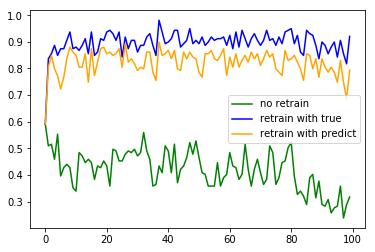

In [6]:
no_retrain_line,           = plt.plot(list(range(len(res1))), res1, label = 'no retrain', color = 'green')
retrain_with_true_line,    = plt.plot(list(range(len(res2))), res2, label = 'retrain with true', color = 'blue')
retrain_with_predict_line, = plt.plot(list(range(len(res2))), res3, label = 'retrain with predict', color = 'orange')
plt.legend(handles = [no_retrain_line, retrain_with_true_line, retrain_with_predict_line])
plt.show()

# Retrain with same time interval in each window

In [7]:
with open('../datas/bbc_classifyTimeSeries.json') as f:
    datasss = json.load(f)

In [8]:
import datetime
def to_datetime(date):
    return datetime.datetime.strptime(date , '%d %B %Y')

for datass in datasss:
    date  = datass['date']
    datas = datass['datas']
    
    datass['date'] = to_datetime(date)
    for data in datas:
        data['date'] = to_datetime(data['date'])


## time interval: 30 days

In [9]:
from dateutil import relativedelta
init_date = datasss[0]['date']
datasss_30_day = []
interval = 30
datediff = relativedelta.relativedelta(days = interval)

cur_date = init_date
for datass in datasss:
    date = datass['date']
    datas = datass['datas']
    if date < cur_date:
        datasss_30_day[-1] += (datas)
    else:
        datasss_30_day.append(datas)
        cur_date = cur_date + datediff

### Number of articles in each intervals

In [10]:
datasss_30_day_cnt = [len(datass) for datass in datasss_30_day]

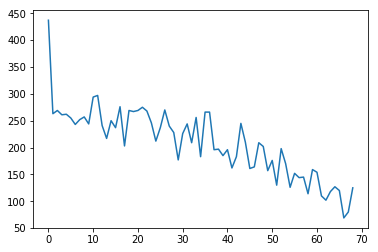

In [15]:
plt.plot(list(range(len(datasss_30_day_cnt))), datasss_30_day_cnt)
plt.show()

In [12]:
datasss_30_day_cnt = [len(datass) for datass in datasss_30_day][20:]

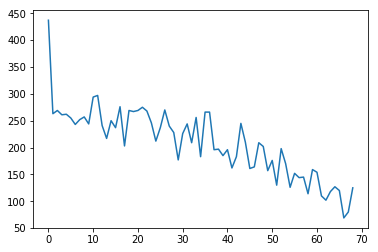

In [13]:
plt.plot(list(range(len(datasss_30_day_cnt))), datasss_30_day_cnt)
plt.show()

In [18]:
# The Naive Bayes Model
nb = NaiveBayes()
# Record all of the predictions
predicts_all = []
# Number of all of the correctly predicted articles
correct_all = 0
# Correctly predicted ratio in each part
correct_ratios = []
# First train, if reTrain = False, only train

datasss_x = datasss_30_day
for i in range(len(datasss_x)-1):
    datas_train = datasss_x[i]
    datas_valid = datasss_x[i+1]
    
    nb.train(datas_train)
    
    # All of the predictions in this part
    predicts = [nb.predict(data['content'])[0] for data in datas_valid]
    # Append to all of the predictions
    predicts_all += predicts
    # Number of correctly predicted articles in this part
    correct = 0
    for i in range(len(predicts)):
        if predicts[i] == datas_valid[i]['category']:
            correct += 1
    # Add to all of the correctly predicted articles
    correct_all += correct
    # Add to all of the ratios
    correct_ratios.append(correct/len(datas_valid))
    print("Correct: ", correct, "out of ", len(datas_valid))
    print(datas_valid[-1]['date'])
    #
    

Trained from 94 documents out of 94
Correct:  33 out of  78
2010-09-10 00:00:00
Trained from 78 documents out of 78
Correct:  79 out of  95
2010-10-11 00:00:00
Trained from 95 documents out of 95
Correct:  92 out of  110
2010-11-10 00:00:00
Trained from 110 documents out of 110
Correct:  84 out of  103
2010-12-10 00:00:00
Trained from 103 documents out of 103
Correct:  60 out of  71
2011-01-09 00:00:00
Trained from 71 documents out of 71
Correct:  101 out of  115
2011-02-08 00:00:00
Trained from 115 documents out of 115
Correct:  90 out of  99
2011-03-10 00:00:00
Trained from 99 documents out of 99
Correct:  82 out of  91
2011-04-09 00:00:00
Trained from 91 documents out of 91
Correct:  66 out of  79
2011-05-09 00:00:00
Trained from 79 documents out of 79
Correct:  71 out of  81
2011-06-08 00:00:00
Trained from 81 documents out of 81
Correct:  60 out of  69
2011-07-08 00:00:00
Trained from 69 documents out of 69
Correct:  58 out of  65
2011-08-05 00:00:00
Trained from 65 documents out 

In [ ]:
datasss_30_day[0]